In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import requests
import json
import matplotlib
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

matplotlib.rcParams['figure.figsize'] = (100, 80)
matplotlib.rcParams['figure.dpi'] = 800

In [2]:
r = requests.get('https://api.iextrading.com/1.0/stock/shld/chart/5y')

In [3]:
json_data = json.dumps(r.json())

In [4]:
pandas_df = pd.read_json(json_data)

In [5]:
pandas_df.head()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,0.290,0.000000,0.647,45.130,2013-09-04,46.17,"Sep 4, 13",44.390,44.8200,1175640,1175640,45.2946
1,2.830,0.062708,6.271,47.960,2013-09-05,49.05,"Sep 5, 13",44.555,44.5800,1840980,1840980,47.2321
2,-0.910,0.042544,-1.897,47.050,2013-09-06,48.40,"Sep 6, 13",46.330,48.4000,902129,902129,47.1968
3,6.019,0.175914,12.793,53.069,2013-09-09,55.24,"Sep 9, 13",47.030,47.0300,2900745,2900745,51.8134
4,3.571,0.255041,6.729,56.640,2013-09-10,59.24,"Sep 10, 13",52.900,53.0201,3778080,3778080,56.5896


In [6]:
pandas_df.date = pd.to_datetime(pandas_df.date)

In [7]:
pandas_df.date = pandas_df['date'].map(dt.datetime.toordinal)

In [8]:
pandas_df.head()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
0,0.290,0.000000,0.647,45.130,735115,46.17,"Sep 4, 13",44.390,44.8200,1175640,1175640,45.2946
1,2.830,0.062708,6.271,47.960,735116,49.05,"Sep 5, 13",44.555,44.5800,1840980,1840980,47.2321
2,-0.910,0.042544,-1.897,47.050,735117,48.40,"Sep 6, 13",46.330,48.4000,902129,902129,47.1968
3,6.019,0.175914,12.793,53.069,735120,55.24,"Sep 9, 13",47.030,47.0300,2900745,2900745,51.8134
4,3.571,0.255041,6.729,56.640,735121,59.24,"Sep 10, 13",52.900,53.0201,3778080,3778080,56.5896


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(pandas_df.date, pandas_df.close, test_size=0.2, random_state=42)

Text(0.5,1,'Training Set')

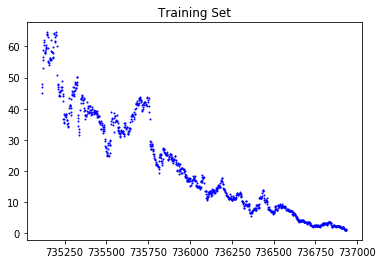

In [10]:
plt.plot(X_train, Y_train, 'bo', markersize=1)
plt.title("Training Set")

Text(0.5,1,'Test Set')

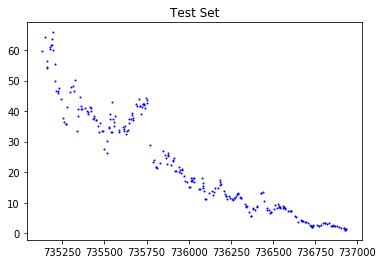

In [11]:
plt.plot(X_test, Y_test, 'bo', markersize=1)
plt.title("Test Set")

In [12]:
coef_lin = poly.polyfit(X_train, Y_train, 1)
coef_sq = poly.polyfit(X_train, Y_train, 2)
coef_cube = poly.polyfit(X_train, Y_train, 40)

/Users/admin/.local/share/virtualenvs/data_analysis-TBJe_GYa/lib/python3.7/site-packages/numpy/polynomial/polynomial.py:1477: RuntimeWarning: overflow encountered in square
  scl = np.sqrt(np.square(lhs).sum(1))
/Users/admin/.local/share/virtualenvs/data_analysis-TBJe_GYa/lib/python3.7/site-packages/ipykernel_launcher.py:3: RankWarning: The fit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


In [13]:
X_line = np.linspace(735115, 737000, 10000)

ffit_lin = poly.polyval(X_line, coef_lin)
ffit_sq = poly.polyval(X_line, coef_sq)
ffit_poly = poly.polyval(X_line, coef_cube)

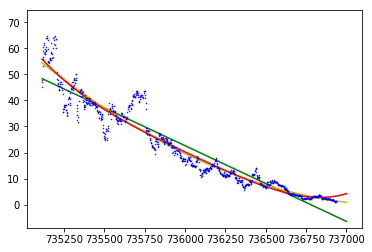

In [14]:
plt.ylim(min(Y_train - 10), max(Y_train + 10))

plt.plot(X_line, ffit_lin, 'g')
plt.plot(X_line, ffit_sq, 'y')
plt.plot(X_line, ffit_poly, 'r')

plt.plot(X_train, Y_train, 'b.', markersize=1)